# Video Game Market Intelligence

Built an end-to-end data analytics solution using Python to analyze global video game sales, uncovering demand cycles, market leaders, and revenue concentration risks through advanced aggregation and trend analysis.

<img src='https://media.istockphoto.com/photos/video-gaming-console-man-playing-rpg-strategy-game-picture-id1324673294?b=1&k=20&m=1324673294&s=170667a&w=0&h=Cv-F1d5n6nPr_VydhJ0D82u2uiyCZ1dK1ZqBwTzjq5A=' alt='Video Games' width='600' height='400'>

## About the dataset

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com](vgchartz.com).
| Column Name     | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| Rank            | Ranking of overall sales                                                     |
| Name            | Name of the game                                                             |
| Platform        | Platform on which the game was released (e.g., PC, PS4, Xbox)                |
| Year            | Year of the game's release                                                   |
| Genre           | Genre of the game                                                            |
| Publisher       | Publisher of the game                                                        |
| NA_Sales        | Sales in North America (in millions)                                         |
| EU_Sales        | Sales in Europe (in millions)                                                |
| JP_Sales        | Sales in Japan (in millions)                                                 |
| Other_Sales     | Sales in the rest of the world (in millions)                                 |
| Global_Sales    | Total worldwide sales (in millions)                                          |


## Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading Dataset
You can download this dataset from Kaggle. Here is the link: 'https://www.kaggle.com/datasets/gregorut/videogamesales'

In [23]:
# Read the video game sales dataset from a CSV file into a pandas DataFrame
df=pd.read_csv(r"C:\Users\cheta\Downloads\vgsales.csv")

## Data Exploration

In [25]:
df.shape

(16598, 11)

In [26]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [28]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [30]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [31]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [32]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [33]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [34]:
len(df['Publisher'].unique())

579

In [35]:
continuous= df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
discrete= df[['Name','Platform','Genre','Publisher']]

In [36]:
continuous.describe()        #Generate descriptive statistics of continuous variable

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [37]:
discrete.describe()         #Generate descriptive statistics of discrete variable

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


## Data Cleaning

In [39]:
df.duplicated().sum()  #handling duplicate data

0

In [40]:
df.isnull().sum()    # handling missing data

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [41]:
df=df.dropna()

In [42]:
df.shape[0]

16291

In [43]:
df['Year']=df['Year'].astype('int64')     #convert the 'Year' column to integer data type

In [44]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Exploratory Data Analysis (EDA)

In [46]:
Q1=df['Global_Sales'].quantile(0.25)     # Calculate the 25th percentile
Q1

0.06

In [47]:
Q3=df['Global_Sales'].quantile(0.75)     # Calculate the 75th percentile
Q3

0.48

In [48]:
IQR=Q3-Q1            # Calculate the Interquartile Range (IQR)
IQR

0.42

In [49]:
lower_limit=Q1-(1.5*IQR)         # Calculate lower limit
upper_limit=Q3+(1.5*IQR)         # Calculate upper limit

In [50]:
df[(df["Global_Sales"]>upper_limit) | (df["Global_Sales"]<lower_limit)].shape   # identifies potential outliers

(1826, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

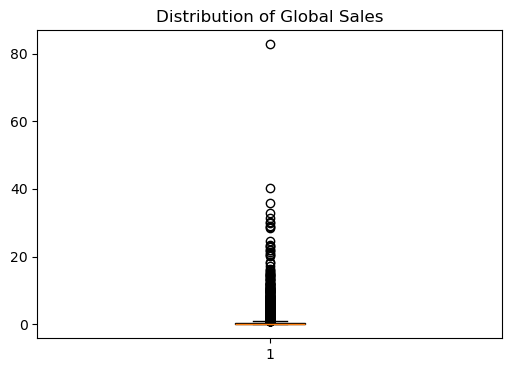

In [51]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Global_Sales'],patch_artist=True)  # boxplot to visualize the distribution of Global_Sales
plt.title('Distribution of Global Sales')
plt.show

Out of the total dataset, **1,826** records are identified as outliers using the IQR method. This is statistically acceptable and expected for Global_Sales, as video game sales naturally follow a blockbuster-driven distribution; therefore, these outliers represent genuine high-performing titles and should not be removed from the analysis.

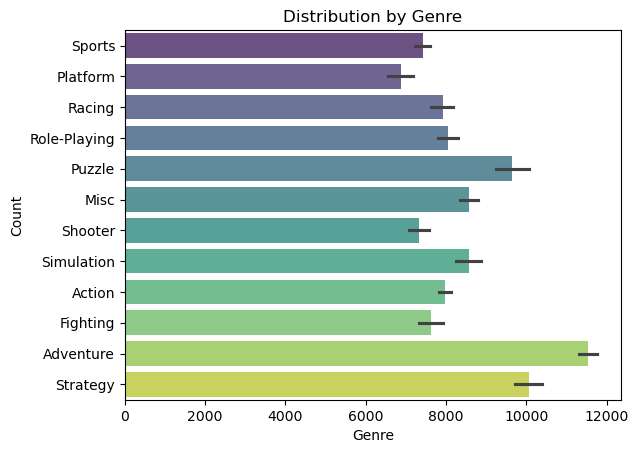

In [53]:
#Create a bar plot showing the distribution of video games by genre
sns.barplot(df['Genre'],palette='viridis',alpha=0.8)
plt.title('Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

### Key Performance Indicators (KPIs)

* **Top-Selling Title**

In [56]:
df[df['Global_Sales']==df['Global_Sales'].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


*Wii Sports*, a Sports title released on the Wii platform by Nintendo, is the top-selling game with **82.74 million** global sales, highlighting the dominance of first-party console-bundled titles.

In [58]:
min_sale=df[df['Global_Sales']==df['Global_Sales'].min()]
min_sale[['NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales']].sum()

NA_Sales       1.43
EU_Sales       1.54
JP_Sales       3.12
Other_Sales    0.00
dtype: float64

The lowest-selling title records minimal global sales with contributions primarily from **Japan (3.12M)**, while Other regions show no sales, indicating a highly localized and commercially limited market performance.

* **Regional Sales Peak**

In [61]:
df[['NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales']].max()

NA_Sales       41.49
EU_Sales       29.02
JP_Sales       10.22
Other_Sales    10.57
dtype: float64

**North America** records the highest regional sales peak <u>(41.49M)</u>, followed by Europe (29.02M), indicating that global blockbuster performance is predominantly driven by Western markets, with comparatively lower peak contributions from Japan and other regions.

* **Most Frequent Genre**

In [64]:
df['Genre'].value_counts().sort_values(ascending=False).head(1)

Genre
Action    3251
Name: count, dtype: int64

**Action** is the most frequent genre in the dataset, indicating strong publisher preference and sustained market demand for high-engagement, mainstream game categories.

* **Most Active Platform**

In [67]:
df['Platform'].value_counts().sort_values(ascending=False).head(1)

Platform
DS    2131
Name: count, dtype: int64

**Nintendo DS** is the most active platform by number of releases, reflecting its long market lifespan and strong publisher adoption during its peak years.

* **Top Publisher by Releases**

In [70]:
df['Publisher'].value_counts().sort_values(ascending=False).head(1)

Publisher
Electronic Arts    1339
Name: count, dtype: int64

**Electronic Arts** is the most active publisher with 1,339 releases, indicating a high-volume, portfolio-driven publishing strategy focused on scale and market presence.

* **Peak Release Year**

In [73]:
df['Year'].value_counts().sort_values(ascending=False).head(1)

Year
2009    1431
Name: count, dtype: int64

The year **2009** records the highest number of game releases, reflecting an industry peak aligned with major console lifecycle maturity and heightened publisher activity.

## **Strategic Business Insights**

### Q1. Which Game Genres Deliver Sustainable Revenue?

#### Total Global Sales by Genre

* **Which genres materially contribute to total industry revenue?**

In [79]:
genre_sales=df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

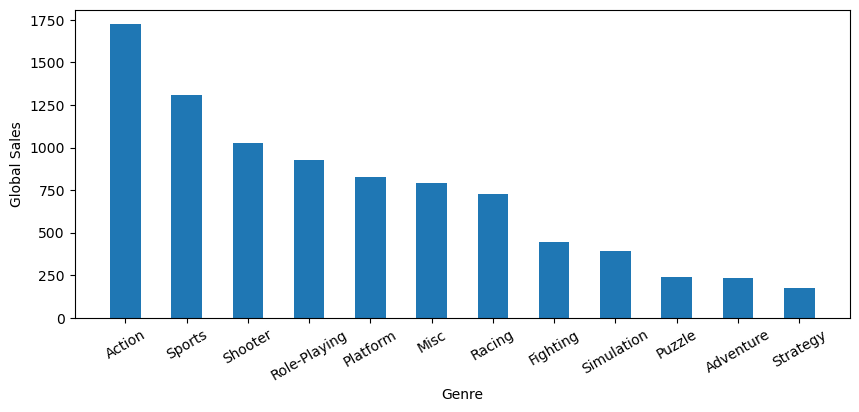

In [80]:
x=genre_sales.index.tolist()
y=genre_sales.values
plt.figure(figsize=(10,4))
plt.bar(x,y,width=0.5)
plt.xlabel("Genre")
plt.ylabel("Global Sales")
plt.xticks(rotation=30)
plt.show()

Revenue is highly concentrated in a small number of genres, confirming that only a subset of genres materially drive industry-level monetization.

In [82]:
genre_sales.mean()

734.3308333333333

In [83]:
genre_sales[genre_sales.values>genre_sales.mean()].index.tolist()

['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc']

* Action, Sports, Shooter, Role-Playing, Platform, and Misc genres dominate total global sales.
* Several genres contribute materially less than the industry average.

#### Average Revenue per Game

* **If we launch a game in this genre, what is the expected return?**

In [87]:
genre_avgsales=(df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False))
genre_avgsales

Genre
Platform        0.947577
Shooter         0.800468
Role-Playing    0.628456
Racing          0.593273
Sports          0.568247
Fighting        0.531160
Action          0.529942
Misc            0.468488
Simulation      0.459882
Puzzle          0.424930
Strategy        0.258612
Adventure       0.184137
Name: Global_Sales, dtype: float64

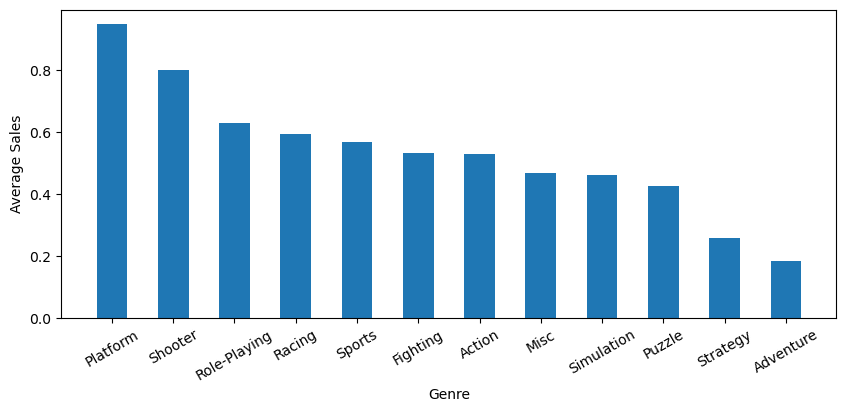

In [88]:
x=genre_avgsales.index.tolist()
y=genre_avgsales.values
plt.figure(figsize=(10,4))
plt.bar(x,y,width=0.5)
plt.xlabel("Genre")
plt.ylabel("Average Sales")
plt.xticks(rotation=30)
plt.show()

High total revenue does not translate into high expected returns; some genres scale through volume rather than efficiency.
* Platform and Shooter genres lead in average sales per title.
* Action and Sports, despite high total revenue, deliver lower average returns due to heavy title saturation.

#### Number of Games Released by Genre

* **Is performance driven by quality or quantity?**

In [92]:
genre_count=df['Genre'].value_counts()
genre_count

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

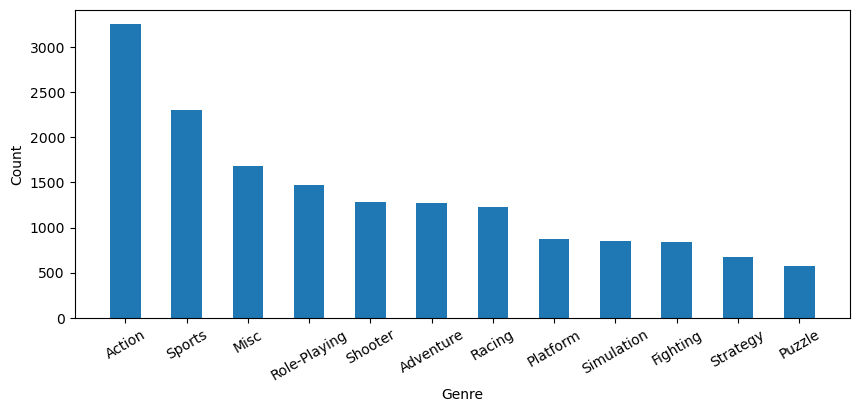

In [93]:
x=genre_count.index.tolist()
y=genre_count.values
plt.figure(figsize=(10,4))
plt.bar(x,y,width=0.5)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

Genres with fewer titles and higher averages indicate superior monetization efficiency and stronger per-game economics.
* Action and Sports have disproportionately high title counts.
* Platform and Shooter achieve strong averages with fewer releases.

#### Variation of Global Sales by Genre

* **How predictable are returns in each genre?**

In [97]:
genre_stdsales=df.groupby('Genre')['Global_Sales'].std(ddof=0).sort_values(ascending=False)
genre_stdsales

Genre
Platform        2.598453
Sports          2.104470
Shooter         1.832863
Role-Playing    1.716867
Racing          1.676688
Puzzle          1.576181
Misc            1.331755
Simulation      1.206716
Action          1.165059
Fighting        0.957342
Strategy        0.524183
Adventure       0.510702
Name: Global_Sales, dtype: float64

High-revenue genres often operate under hit-or-miss economics, while stable genres offer predictability at the cost of growth.
* Platform, Sports, and Shooter exhibit high volatility.
* Strategy and Adventure show low volatility but lower upside.

### Sustainable Revenue by Game Genre

* **Action** and **Sports** genres deliver the most sustainable revenue, driven by large market size, recurring consumer demand, and portfolio-level stability, even though individual title returns are diluted by high release volumes.

* **Role-Playing** games offer the strongest balance of scale and reliability, combining above-average total sales with healthier per-title returns, making them optimal for long-term, franchise-led investment.

* **Platform** games provide high-return but high-risk monetization, requiring selective, IP-backed investments, while lower-revenue genres should be positioned as niche or maintenance plays rather than growth engines.

### Q2. Which Platforms Should Be Prioritized for Future Releases?
#### Total Global Sales by Platform
* **Which platforms materially drive global revenue?**

In [101]:
platform_sales=df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

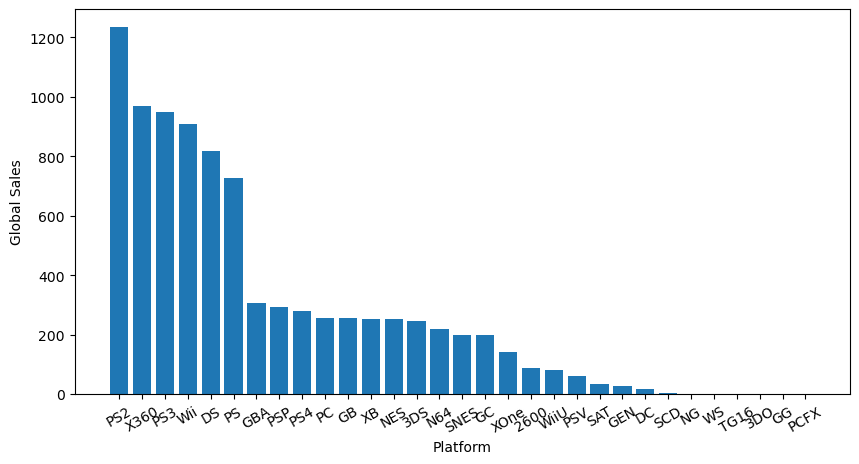

In [102]:
x=platform_sales.index.tolist()
y=platform_sales.values
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.xlabel("Platform")
plt.ylabel("Global Sales")
plt.xticks(rotation=30)
plt.show()

* **PS2, X360, PS3, Wii** dominate total global sales.
* Sharp drop-off after the top tier, indicating revenue concentration.
* Long tail of platforms with negligible contribution.

#### Platform Lifecycle Trend(PS2)


In [105]:
ps2_data=df[df['Platform']=='PS2']
ps2_lifecycle=ps2_data.groupby('Year')['Global_Sales'].sum()
ps2_lifecycle

Year
2000     39.11
2001    166.43
2002    205.40
2003    184.29
2004    211.78
2005    160.65
2006    103.42
2007     76.00
2008     53.83
2009     26.45
2010      5.63
2011      0.47
Name: Global_Sales, dtype: float64

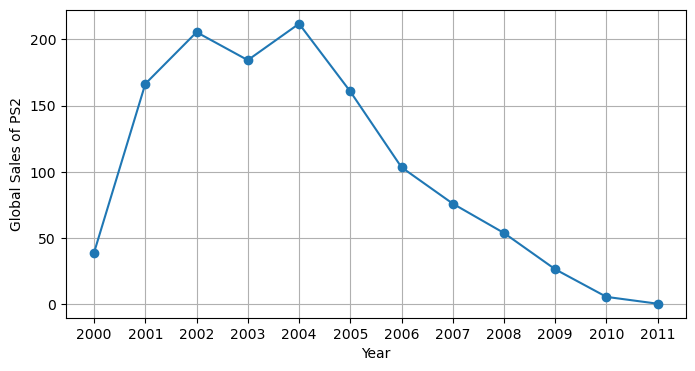

In [106]:
x=ps2_lifecycle.index.tolist()
y=ps2_lifecycle.values
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(x,y,marker='o')
plt.xlabel("Year")
plt.ylabel("Global Sales of PS2")
plt.xticks(x)
plt.show()

* Rapid growth (2000–2002)
* Extended peak (2002–2005)
* Clear decline post-2006

#### Platform Sales Distribution

In [109]:
platform_sales.describe()

count      31.000000
mean      284.257097
std       347.595027
min         0.030000
25%        22.165000
50%       200.050000
75%       284.905000
max      1233.460000
Name: Global_Sales, dtype: float64

#### Average Sales per Game by Platform
* **What is the expected ROI per release on each platform?**

In [111]:
platform_avgsales=(df.groupby('Platform').agg(avg_sales=('Global_Sales','mean'),no_of_games=('Global_Sales','count'))
.sort_values(by='avg_sales',ascending=False))
platform_avgsales

,avg_sales,no_of_games
Platform,,
GB,2.622887,97
NES,2.561939,98
GEN,1.050370,27
SNES,0.837029,239
PS4,0.827679,336
X360,0.785737,1234
2600,0.746293,116
PS3,0.728029,1304
Wii,0.705279,1290


High average sales must be interpreted alongside title volume; sustainable platforms balance ROI with ecosystem depth.
* Legacy platforms **(GB, NES, SNES)** show high averages due to survivorship bias.
* Modern mass platforms show moderate averages with high title counts.
* Platforms like **PS2, PS3, X360** combine scale with acceptable per-title returns.

#### Platform Lifecycle Trend(GB)
* **Are legacy platforms viable for future investment?**

In [114]:
GB_data=df[df['Platform']=='GB']
GB_lifecycle=GB_data.groupby('Year')['Global_Sales'].sum()
GB_lifecycle

Year
1988     1.43
1989    64.98
1990     4.89
1991     5.57
1992    25.48
1994    12.17
1995     3.60
1996    36.02
1997     6.37
1998    26.90
1999    38.01
2000    19.76
2001     9.24
Name: Global_Sales, dtype: float64

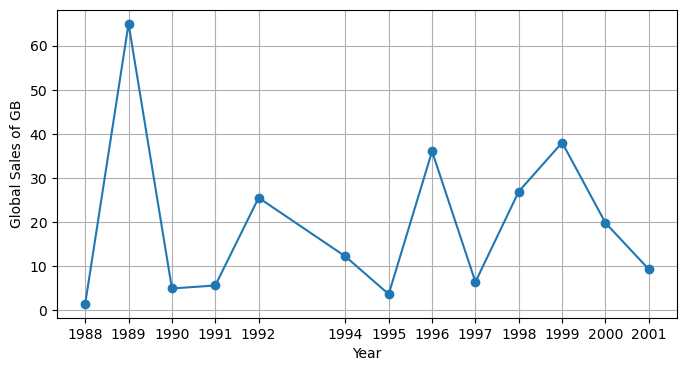

In [115]:
x=GB_lifecycle.index.tolist()
y=GB_lifecycle.values
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(x,y,marker='o')
plt.xticks(x)
plt.xlabel("Year")
plt.ylabel("Global Sales of GB")
plt.show()

* GB platforms lack forward revenue viability despite historical success.

#### Platform × Genre Sales Matrix

In [118]:
platform_genre_matrix = (df.groupby(["Platform", "Genre"])["Global_Sales"]
      .sum().unstack(fill_value=0))
platform_genre_matrix

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,26.39,0.40,0.77,3.58,13.27,13.65,2.32,0.00,22.97,0.45,2.77,0.00
3DO,0.00,0.06,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00
3DS,56.61,4.73,10.46,10.48,32.23,5.56,14.41,75.71,1.22,26.59,6.18,2.09
DC,1.26,2.50,1.83,0.00,2.54,0.00,2.65,0.68,0.33,0.52,3.66,0.00
DS,114.16,47.15,7.20,137.67,77.40,83.87,38.58,126.56,8.20,131.65,31.71,14.76
GB,7.92,17.16,0.00,13.35,53.88,47.47,4.55,88.24,1.20,3.55,9.05,8.05
GBA,54.26,12.10,4.21,28.50,78.08,12.09,18.80,64.21,3.60,5.91,16.41,7.45
GC,37.25,5.93,18.43,16.45,28.66,4.57,21.79,13.03,13.63,8.59,24.49,4.32
GEN,2.74,0.19,5.90,0.03,15.45,0.00,0.26,0.27,0.13,0.00,3.20,0.19


<Axes: xlabel='Genre', ylabel='Platform'>

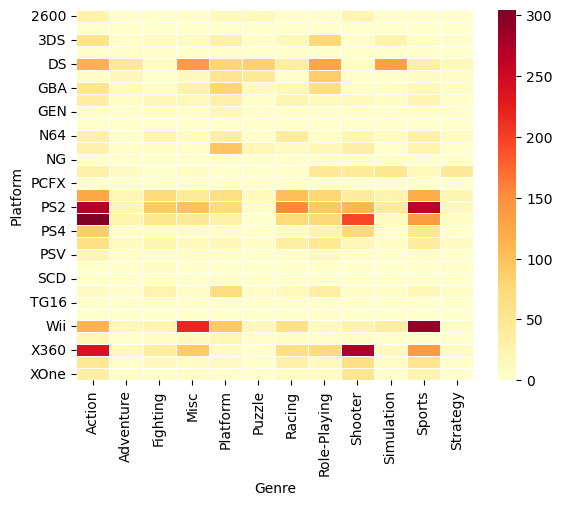

In [119]:
sns.heatmap(platform_genre_matrix,cmap="YlOrRd",linewidths=0.5)

* **Action, Sports, Shooter** dominate on **PS2, PS3, X360**
* **Nintendo** platforms show strength in **Platform, Puzzle,** and **Misc** genres
* No platform is genre-agnostic

### Platform Prioritization
* **PS2, X360, PS3**, and **Wii** should be treated as core release platforms, as they combine the highest revenue scale with mature ecosystems and proven multi-genre monetization.
* **PS4** and **XOne** warrant selective, IP-led investment, while legacy and declining platforms should be deprioritized due to shrinking demand and weak future viability.

### Q3. Which Regions Drive Profitability — and Why?

In [123]:
region_totalsales=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
region_totalsales

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64

In [124]:
region_avgsales=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean()
region_avgsales

NA_Sales       0.265647
EU_Sales       0.147731
JP_Sales       0.078833
Other_Sales    0.048426
dtype: float64

**North America** not only delivers scale but also superior per-title monetization, making it the most capital-efficient region.

* **Where does global revenue actually come from?**

In [127]:
region_percentage = (region_totalsales / region_totalsales.sum()) * 100
region_percentage

NA_Sales       49.135852
EU_Sales       27.325399
JP_Sales       14.581517
Other_Sales     8.957232
dtype: float64

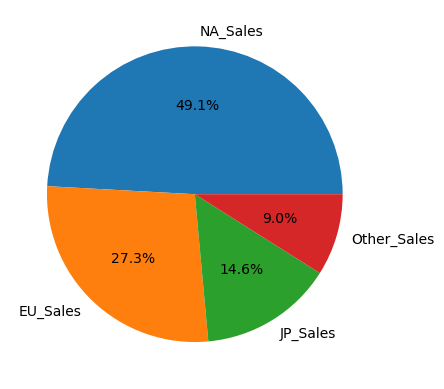

In [128]:
plt.pie(region_percentage,labels=region_percentage.index,autopct="%1.1f%%")
plt.show()

**North America** is the primary profit engine, contributing nearly half of total revenue, creating both strong profitability and high geographic dependency risk.
* North America ~49% of global sales
* Europe ~27%
* Japan ~15%
* Rest of World <9%

#### Region × Genre Sales
* **Why do regions perform differently?**

In [131]:
region_genre=(df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
.sum().sort_values(by='NA_Sales',ascending=False))
region_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Sports,670.09,371.34,134.76,132.65
Shooter,575.16,310.45,38.18,101.90
Platform,445.99,200.65,130.65,51.51
Misc,396.92,211.77,106.67,73.92
Racing,356.93,236.31,56.61,76.68
Role-Playing,326.50,187.57,350.29,59.38
Fighting,220.74,100.00,87.15,36.19
Simulation,181.78,113.02,63.54,31.36


<Axes: ylabel='Genre'>

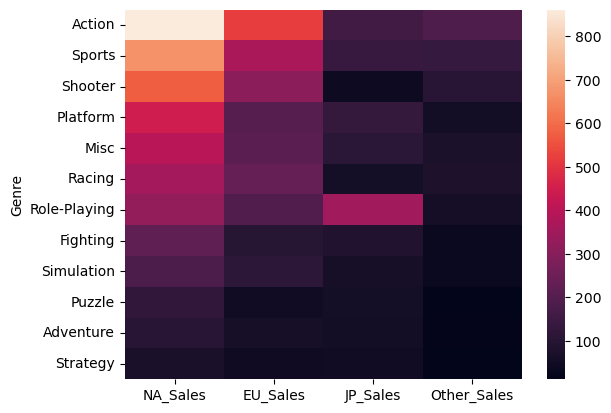

In [132]:
sns.heatmap(region_genre)

Regional profitability is driven by genre preference, not overall market size alone.
* **Action, Sports, Shooter** dominate **NA** and **EU**
* **Role-Playing** is disproportionately strong in **Japan**
* Casual and niche genres show limited regional upside

#### Regional Sales Over Time
* **Is regional demand stable over time?**

In [135]:
region_yearlysale=df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
region_yearlysale

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93
1987,8.46,1.41,11.63,0.20
1988,23.87,6.59,15.76,0.99


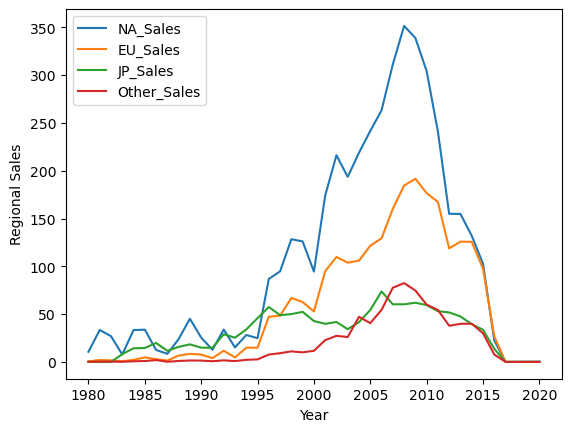

In [136]:
x=region_yearlysale.index.tolist()
y=region_yearlysale.values
plt.plot(x,y,label=region_yearlysale.columns.tolist())
plt.legend()
plt.xlabel("Year")
plt.ylabel("Regional Sales")
plt.show()

Sustainable profitability is driven by **North America** and **Europe**, while **Japan** contributes selective, genre-driven upside rather than broad-market growth.
* NA consistently leads across decades
* EU closely tracks NA at a lower scale
* JP diverges with genre-specific strength
* Other regions never reach scale

### Regional profitability drivers
* **North America** is the primary profit engine, delivering nearly half of global revenue and the highest average sales per title, making it the most capital-efficient market.
* **Europe** provides secondary scale and revenue stability, while **Japan** contributes focused, genre-driven upside, particularly in Role-Playing titles, rather than broad-market growth.

### Q4. How Has Consumer Demand Evolved Over Time?
#### Global Sales by Year
* **What does overall industry demand look like over time?**

In [140]:
yearly_sales=df.groupby('Year',as_index=False)['Global_Sales'].sum()
yearly_sales

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


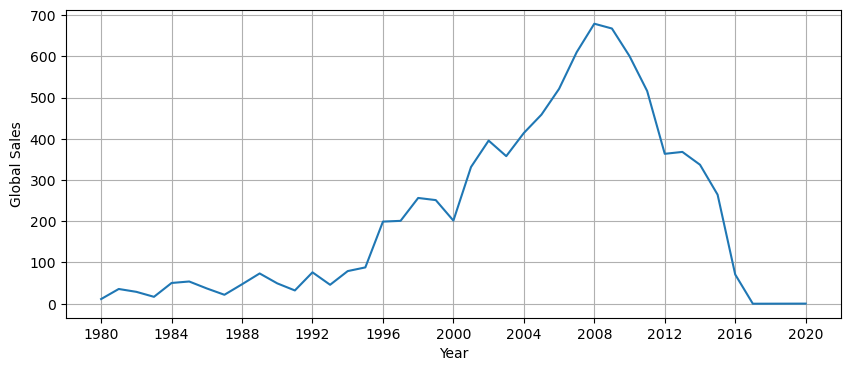

In [141]:
x=yearly_sales['Year']
y=yearly_sales['Global_Sales']
plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.grid()
plt.xticks(np.arange(min(x),max(x)+1,4))
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.show()

* Low, volatile demand in the 1980s and early 1990s
* Rapid acceleration from mid-1990s onward
* Peak sales between 2006–2009
* Sharp contraction post-2010

#### Year-over-Year (YoY) Growth
* **When was demand accelerating or contracting?**

In [144]:
yearly_sales["yoy_growth_pct"] = yearly_sales["Global_Sales"].pct_change() * 100
yoy_data = yearly_sales.dropna(subset=["yoy_growth_pct"])
yoy_data

,Year,Global_Sales,yoy_growth_pct
1,1981,35.77,214.323374
2,1982,28.86,-19.317864
3,1983,16.79,-41.822592
4,1984,50.36,199.940441
5,1985,53.94,7.108817
6,1986,37.07,-31.275491
7,1987,21.74,-41.354195
8,1988,47.22,117.203312
9,1989,73.45,55.548496
10,1990,49.39,-32.756978


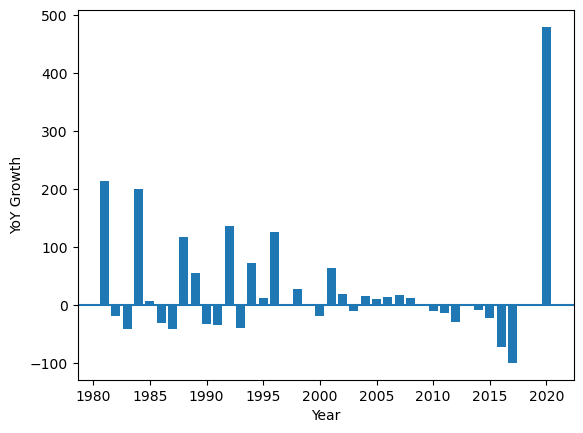

In [145]:
plt.bar(yoy_data["Year"],yoy_data["yoy_growth_pct"])
plt.axhline(0)
plt.xlabel("Year")
plt.ylabel("YoY Growth")
plt.show()

Growth volatility increases near market peaks, while sustained negative YoY growth signals demand exhaustion rather than temporary fluctuation.
* Extremely high YoY growth during early growth phases
* Stabilizing but positive growth approaching peak years
* Persistent negative growth post-2009 with occasional noise

#### Top Genres Over Time
* **Which genres sustained demand over time?**

In [148]:
top_genre=genre_sales.head(4).index
top_genre_df = df[df["Genre"].isin(top_genre)]
top_genre_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
...,...,...,...,...,...,...,...,...,...,...,...
16585,16588,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
16587,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01


In [149]:
genre_over_time=(top_genre_df.groupby(['Genre','Year'],as_index=False)['Global_Sales']
.sum().pivot(index='Year', columns='Genre', values='Global_Sales'))
genre_over_time

Genre,Action,Role-Playing,Shooter,Sports
Year,,,,
1980,0.34,NaN,7.07,0.49
1981,14.84,NaN,10.04,0.79
1982,6.52,NaN,3.79,1.05
1983,2.86,NaN,0.48,3.20
1984,1.85,NaN,31.10,6.18
1985,3.52,NaN,1.00,1.96
1986,13.74,2.52,3.89,5.57
1987,1.12,4.65,0.71,3.72
1988,1.75,5.88,0.51,3.60


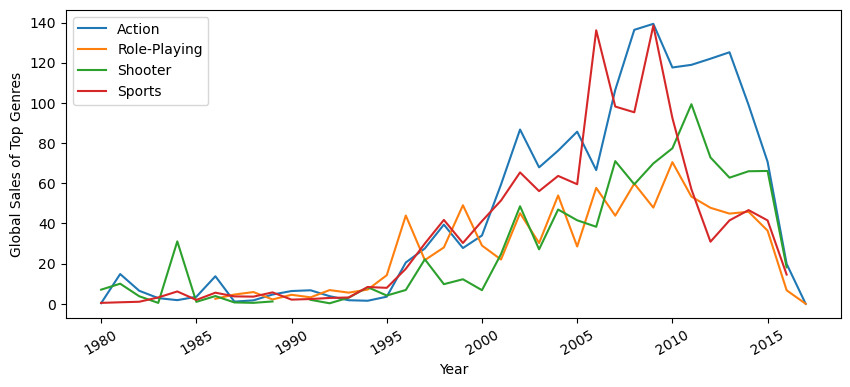

In [150]:
x=genre_over_time.index.tolist()
y=genre_over_time.values
plt.figure(figsize=(10,4))
plt.plot(x,y,label=genre_over_time.columns)
plt.xlabel("Year")
plt.ylabel("Global Sales of Top Genres")
plt.xticks(rotation=30)
plt.legend()
plt.show()

Genre demand cycles are asynchronous, creating opportunities even during broader market slowdowns.
* Genres peak at different periods
* **Shoote**r and **Action** peak later than Sports
* **Role-Playing** shows resilience even as overall demand declines

### Consumer Demand Evolution
* Consumer demand has evolved in clear cycles, with sustained growth from the **mid-1990s**, a peak around **2006–2009**, and a prolonged decline thereafter, confirming that the video game market is cyclical rather than perpetually expanding.
* Volatility increases near peak periods, as reflected in fluctuating year-over-year growth, indicating heightened competition and saturation risk that materially reduces launch upside.
* Demand shifts are driven by platform transitions and genre rotation, making release timing and genre alignment more critical to success than relying on historical average performance.

### Q5. Who Are the Market Leaders — and What Can We Learn From Them?
* **Who controls industry revenue at scale?**

In [154]:
publisher_sales=df.groupby('Publisher',as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales',ascending=False)
publisher_sales["Rank"] = publisher_sales["Global_Sales"].rank(method="dense", ascending=False).astype(int)
publisher_sales

,Publisher,Global_Sales,Rank
359,Nintendo,1784.43,1
138,Electronic Arts,1093.39,2
21,Activision,721.41,3
455,Sony Computer Entertainment,607.28,4
524,Ubisoft,473.54,5
...,...,...,...
147,Epic Games,0.01,267
389,Paradox Development,0.01,267
421,Rain Games,0.01,267
45,Ascaron Entertainment,0.01,267


Market leadership is concentrated; a small group of publishers captures the majority of industry value, while most competitors operate at subscale.
* **Nintendo** ranks #1, followed by **Electronic Arts, Activision, Sony Computer Entertainment** and **Ubisoft**
* Sharp revenue drop beyond top publishers
* Long tail of publishers with negligible sales

#### Publisher Market Share (%)
* **How dominant are the leaders relative to the market?**

In [157]:
publisher_sales["Market_Share_%"] = (
    (publisher_sales["Global_Sales"]) / (publisher_sales["Global_Sales"].sum())
) * 100
publisher_sales

,Publisher,Global_Sales,Rank,Market_Share_%
359,Nintendo,1784.43,1,20.250069
138,Electronic Arts,1093.39,2,12.408009
21,Activision,721.41,3,8.186705
455,Sony Computer Entertainment,607.28,4,6.891535
524,Ubisoft,473.54,5,5.373827
...,...,...,...,...
147,Epic Games,0.01,267,0.000113
389,Paradox Development,0.01,267,0.000113
421,Rain Games,0.01,267,0.000113
45,Ascaron Entertainment,0.01,267,0.000113


* **Nintendo** alone captures **~20%** of total market share
* Top 5 publishers together account for **~53%** of total market revenue

#### Top-10 Publisher Market Share

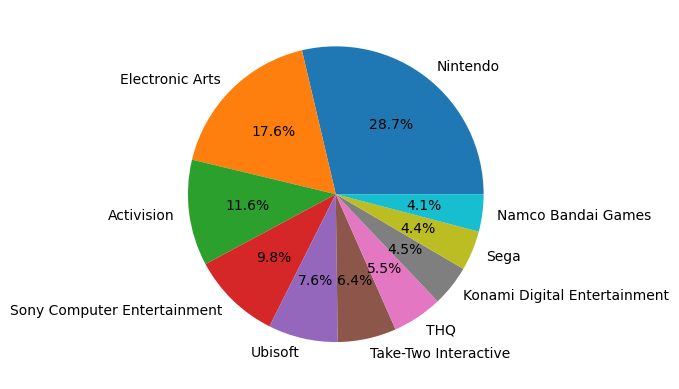

In [160]:
top_publisher=publisher_sales.head(10)
plt.pie(top_publisher['Market_Share_%'],labels=top_publisher['Publisher'],autopct="%1.1f%%")
plt.show()

In [161]:
publisher_sales['Market_Share_%'].head(5).sum()

53.11014449663355

Over half of global revenue controlled by five firms

#### Publisher × Genre Revenue Matrix
* **Are leader strategies intentional or accidental?**

In [164]:
df_publisher_genre=df[(df['Publisher'].isin(top_publisher['Publisher'].head(5))) & (df['Genre'].isin(top_genre.tolist()))]
publisher_genre_matrix = df_publisher_genre.groupby(['Publisher', 'Genre'])['Global_Sales'].sum().unstack(fill_value=0)
publisher_genre_matrix

Genre,Action,Role-Playing,Shooter,Sports
Publisher,,,,
Activision,141.82,46.79,295.40,75.16
Electronic Arts,115.34,35.30,158.26,468.69
Nintendo,128.10,284.57,69.69,218.01
Sony Computer Entertainment,94.52,44.00,57.52,59.39
Ubisoft,142.94,16.76,67.65,23.42


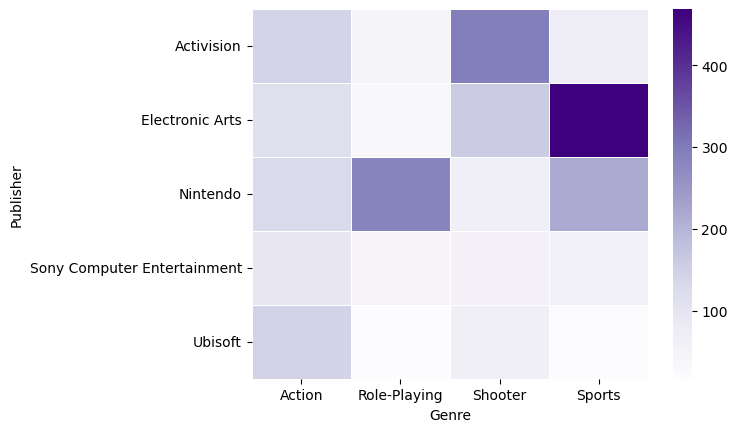

In [165]:
sns.heatmap(publisher_genre_matrix,cmap="Purples",linewidths=0.6)
plt.show()

Leadership success is structurally intentional, driven by disciplined genre specialization.
* **Nintendo**: Strong concentration in Role-Playing and Sports
* **Electronic Arts**: Dominance in Sports
* **Activision**: Heavy focus on Shooter
* **Sony and Ubisoft**: More balanced but still genre-focused

### Market Leaders & Strategic Lessons
* Market leadership is highly concentrated, with a small group of publishers—led by **Nintendo** and **Electronic Arts**—controlling over half of total industry revenue, creating strong scale and entry barriers.
* Leaders win through disciplined focus, consistently investing in a limited set of high-performing genres and aligning tightly with dominant platforms rather than spreading resources thin.
* Sustainable success is driven by repeatable execution, not one-off blockbusters, with diversified regional exposure and steady content pipelines underpinning long-term dominance.